# Data Mining - Project 2
# Car type Classification
Fatemeh Taherinezhad-961235046

Mobina Mosannafat-9612358032

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Using pipeline to test different classifiers
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
# For comparing learning results and accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
# Read dataset from uploaded file and display it
dataset = pd.read_csv('cars.csv')
dataset

,x1,y1,x2,y2,type
0,129,0,202,73,suv
1,86,61,189,189,suv
2,129,21,210,116,suv
3,145,1,212,66,sedan
4,108,73,201,183,sedan
...,...,...,...,...,...
10048,126,0,325,187,truck
10049,101,0,297,195,truck
10050,107,0,300,180,truck
10051,121,0,326,186,truck


In [ ]:
# Display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10053 entries, 0 to 10052
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      10053 non-null  int64 
 1   y1      10053 non-null  int64 
 2   x2      10053 non-null  int64 
 3   y2      10053 non-null  int64 
 4   type    10053 non-null  object
dtypes: int64(4), object(1)
memory usage: 392.8+ KB


In [ ]:
# Seperating featues from class and saving them to numpy arrays
X = dataset[['x1' , 'y1' , 'x2' , 'y2']].values
Y = dataset[['type']].values
Y

array([['suv'],
       ['suv'],
       ['suv'],
       ...,
       ['truck'],
       ['truck'],
       ['truck']], dtype=object)

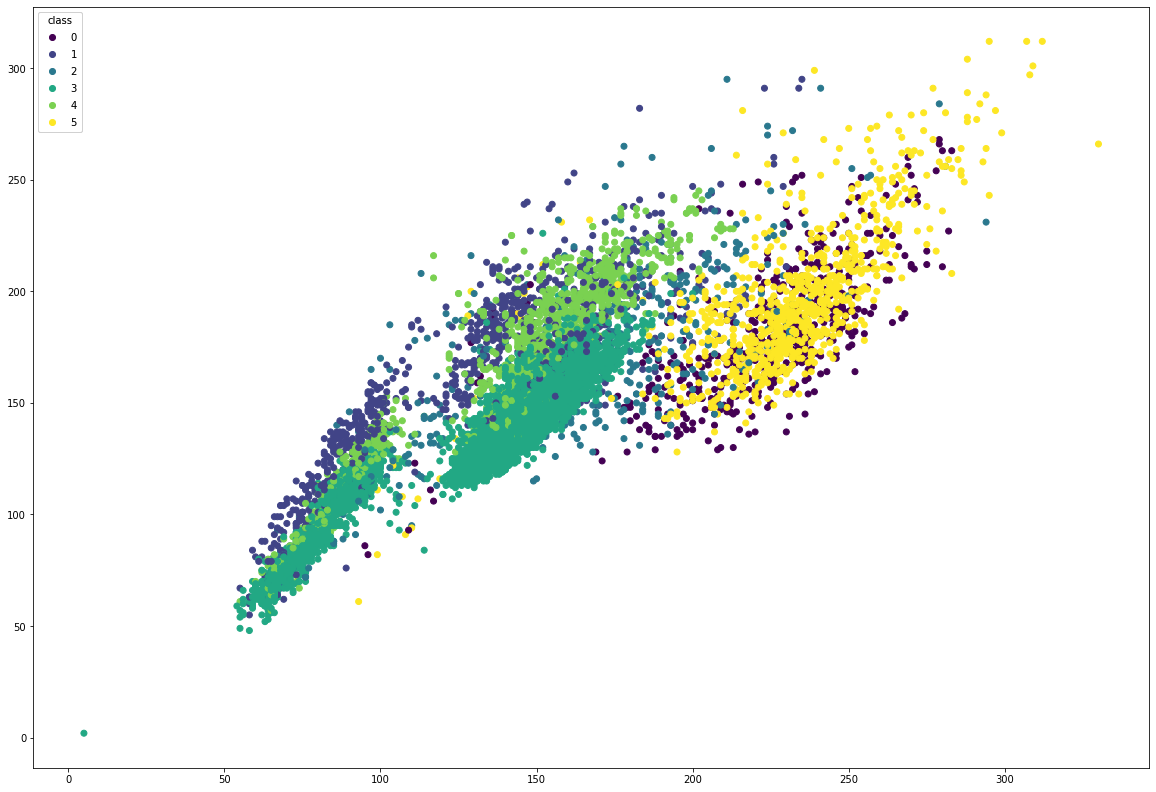

In [ ]:
#scatter plot
Y1 = np.zeros(Y.size)
for k in range(1,10053):
  if Y[(k)] == 'bus':
    Y1[(k)] = 0
  elif Y[(k)] == 'microbus':
    Y1[(k)] = 1
  elif Y[(k)] == 'minivan':
    Y1[(k)] = 2
  elif Y[(k)] == 'sedan':
    Y1[(k)] = 3
  elif Y[(k)] == 'suv':
    Y1[(k)] = 4
  else:
    Y1[(k)] = 5

X1 = X[:,2] - X[:,0]
X2 = X[:,3] - X[:,1]
fig , ax = plt.subplots(figsize=(20,14))

scatter = ax.scatter(X1, X2 , c=Y1)
legend1 = ax.legend(*scatter.legend_elements(num=5),
                    loc="upper left", title="class")
ax.add_artist(legend1)

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2)


In [ ]:
# Using pipeline to test different classifiers
classifiers = [
               Pipeline([
                 ('scaler', StandardScaler()),
                 ('Logistic Regression', LogisticRegression())]),
               Pipeline([
                 ('scaler', StandardScaler()),
                 ('K_Neighbors Classifier', KNeighborsClassifier())]),
               Pipeline([
                 ('scaler', StandardScaler()),
                 ('Radius_Neighbors Classifier', RadiusNeighborsClassifier())]),
               Pipeline([
                 ('scaler', StandardScaler()),
                 ('Decision_Tree Classifier', DecisionTreeClassifier())]),
               Pipeline([
                 ('scaler', StandardScaler()),
                 ('Random_Forest Classifier', RandomForestClassifier())]),
               Pipeline([
                 ('scaler', StandardScaler()),
                 ('LinearSVC', LinearSVC())])
               ]
               

In [ ]:
#name of classifiers
classifier_names = np.array(['Logistic Regression','KNeighborsClassifier','Radius_Neighbors Classifier', 'Decision_Tree Classifier','Random_Forest Classifier','LinearSVC'])

In [ ]:
# For comparing learning results and accuracy

i=0;
for clf in classifiers:
  clf.fit(X_train, Y_train)
  Y_pred = clf.predict(X_test);
  print("\n\n<< ", classifier_names[i]," >>")
  print("\nAccracy : ", accuracy_score(Y_test, Y_pred))
  print("\nConfusion Matrix:\n",confusion_matrix(Y_test, Y_pred))
  print("\nReports:\n",classification_report(Y_test, Y_pred))
  print("\n--------------------------------------------------------------")
  i+=1;

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




<<  Logistic Regression  >>

Accracy :  0.7891596220785678

Confusion Matrix:
 [[  30    1    2    7    0   75]
 [   0   82    9   17   67    5]
 [   9   15   31    9   21    9]
 [   0    1    0 1115   23    0]
 [   0   19   17   66  189    0]
 [  34    6    4    6    2  140]]

Reports:
               precision    recall  f1-score   support

         bus       0.41      0.26      0.32       115
    microbus       0.66      0.46      0.54       180
     minivan       0.49      0.33      0.39        94
       sedan       0.91      0.98      0.95      1139
         suv       0.63      0.65      0.64       291
       truck       0.61      0.73      0.67       192

    accuracy                           0.79      2011
   macro avg       0.62      0.57      0.58      2011
weighted avg       0.77      0.79      0.78      2011


--------------------------------------------------------------


<<  KNeighborsClassifier  >>

Accracy :  0.7906514172053705

Confusion Matrix:
 [[  55    1    6    

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/_classification.py:404: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  SupervisedIntegerMixin.fit(self, X, y)




<<  Radius_Neighbors Classifier  >>

Accracy :  0.7135753356539035

Confusion Matrix:
 [[  13    0    6    1    5   90]
 [   1    5    4  112   42   16]
 [   3    8   10   17   21   35]
 [   0    0    0 1137    2    0]
 [   0    4    9  171  105    2]
 [  12    1    3    3    8  165]]

Reports:
               precision    recall  f1-score   support

         bus       0.45      0.11      0.18       115
    microbus       0.28      0.03      0.05       180
     minivan       0.31      0.11      0.16        94
       sedan       0.79      1.00      0.88      1139
         suv       0.57      0.36      0.44       291
       truck       0.54      0.86      0.66       192

    accuracy                           0.71      2011
   macro avg       0.49      0.41      0.40      2011
weighted avg       0.65      0.71      0.65      2011


--------------------------------------------------------------


<<  Decision_Tree Classifier  >>

Accracy :  0.7821979114868225

Confusion Matrix:
 [[  71  

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)




<<  Random_Forest Classifier  >>

Accracy :  0.8229736449527598

Confusion Matrix:
 [[  75    1    9    0    0   30]
 [   0   82    9   31   52    6]
 [   5   25   38    4    7   15]
 [   0    4    1 1114   20    0]
 [   2   33    7   56  193    0]
 [  22    1   14    0    2  153]]

Reports:
               precision    recall  f1-score   support

         bus       0.72      0.65      0.68       115
    microbus       0.56      0.46      0.50       180
     minivan       0.49      0.40      0.44        94
       sedan       0.92      0.98      0.95      1139
         suv       0.70      0.66      0.68       291
       truck       0.75      0.80      0.77       192

    accuracy                           0.82      2011
   macro avg       0.69      0.66      0.67      2011
weighted avg       0.81      0.82      0.82      2011


--------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




<<  LinearSVC  >>

Accracy :  0.7777225261064147

Confusion Matrix:
 [[   8    1    0   15    0   91]
 [   0   76    0   38   61    5]
 [   5   14    0   16   41   18]
 [   0    0    0 1125   14    0]
 [   1    8    0   96  186    0]
 [   5    6    0    8    4  169]]

Reports:
               precision    recall  f1-score   support

         bus       0.42      0.07      0.12       115
    microbus       0.72      0.42      0.53       180
     minivan       0.00      0.00      0.00        94
       sedan       0.87      0.99      0.92      1139
         suv       0.61      0.64      0.62       291
       truck       0.60      0.88      0.71       192

    accuracy                           0.78      2011
   macro avg       0.54      0.50      0.49      2011
weighted avg       0.72      0.78      0.74      2011


--------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
